Instructions for using Jupyter Notebook: Go through each cell sequentially and run each code by pressing CTRL + ENTER on Windows or COMMAND + ENTER on Mac. You can run and move to the next cell by pressing SHIFT + ENTER. Alternatively, you can click the "Run" button at the top of the interface. Code is displayed if you wish to edit it in any way.

In this notebook, we will illustrate a free energy landscape as a function of multiple generalized coordinates using the conformational fluctuations of the alanine dipeptide as an example. The image below shows a schematic of an alanine dipeptide - this is a polypeptide with exactly two alanine amino-acid residues. Two torsional angles, phi and psi, are used as general coordinates to describe the bond rotations in this system. These two angles are defined in the image below. The blue segments indicate the nitrogen atoms in the peptide backbone, the green segments indicate carbon atoms, the white segments indicate hydrogen atoms, and the red segments indicate oxygen atoms. Two different conformations are shown below in which both phi and psi differ. 

<img src="res/L4_alanine_dipeptide.png" width="550"/>

The contour plot below shows a 2D free energy landscape for the alanine dipeptide in vacuum (not a particularly physiologically relevant state, but useful for illustration) computed from specialized molecular dynamics simulations. The landscape is plotted as a function of phi and psi with the color bar indicating free energies (in units of kT) for different regions of space. Note the deep blue regions that indicate minima. Data are included in an associated CSV file that is being opened for this demonstration.

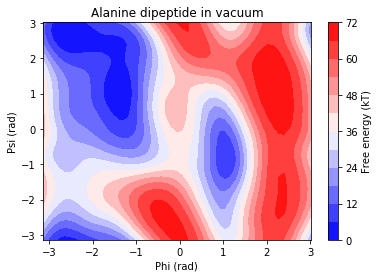

In [2]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyp

# Load in FES and convert to python array
fes = np.loadtxt(open("res/L4_alanine_vac_2d_FES.csv", "rb"), delimiter=",")
phi=fes[:,0].reshape(51, 51)
psi=fes[:,1].reshape(51, 51)
fe=fes[:,2].reshape(51, 51)

# Create the contour plot
fig = pyp.figure()
ax = fig.subplots()
CS = pyp.contourf(phi, psi, fe, 12, cmap='bwr')
ax.set_title('Alanine dipeptide in vacuum')
ax.set_xlabel('Phi (rad)')
ax.set_ylabel('Psi (rad)')

# Make a colorbar for the plot
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Free energy (kT)');

Now let's see what happens when we allow the alanine dipeptide to fluctuate at room temperature (T = 300 K). The video below shows the fluctuations in vacuum using a similar representation as the image above (except carbon atoms are green now). Note the bond rotations, which correspond to configurations on the free energy landscape.

In [3]:
import nglview as ng
import mdtraj as md

traj = md.load('res/L4_ala.xtc', top='res/L4_ala_ref.pdb')
view = ng.show_mdtraj(traj)
view.clear_representations()
view.center()
view.add_representation('licorice', selection='all')
view.camera = 'orthographic'
view

NGLWidget(max_frame=500)

We can now visualize this behavior by plotting the generalized coordinates phi and psi instead of the 3D positions of all atoms. Each of the black points superimposed on the free energy landscape below indicates a single phi/psi value sampled from the simulation trajectory below. Note where they are located.

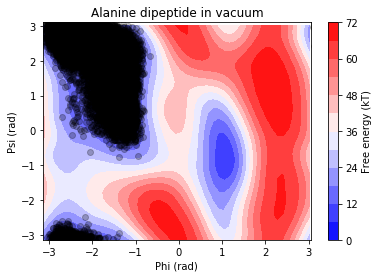

In [4]:
# Load in phi/psi points from unbiased trajectory
unb300 = np.loadtxt(open("res/L4_ala_confs_300K.csv", "rb"), delimiter=",")
unb300phi=unb300[:,0]
unb300psi=unb300[:,1]

# Create the contour plot
fig2 = pyp.figure()
ax2 = fig2.subplots()
CS2 = pyp.contourf(phi, psi, fe, 12, cmap='bwr')
ax2.set_title('Alanine dipeptide in vacuum')
ax2.set_xlabel('Phi (rad)')
ax2.set_ylabel('Psi (rad)')

# Make a colorbar for the plot
cbar2 = fig2.colorbar(CS)
cbar2.ax.set_ylabel('Free energy (kT)');

# put points on top of this
pyp.scatter(unb300phi,unb300psi, c='black', alpha=0.25);
pyp.xlim(-3.14, 3.05);
pyp.ylim(-3.14, 3.1);

Finally, let's see what happens if we raise the temperature. The points superimposed on the free energy surface are now from a simulation at 450 K, instead of 300 K (note that the scale bar still reports energies using kT defined at 300 K). Now we see points sampling both local minima on the free energy landscape, indicating that at a higher temperature there is a higher likelihood of the system escaping from the minimum in which it first is located. We'll talk about this behavior more later in the semester. A hint as to why is visible in the plot - note that some of the black points exist in regions in between the minima where the free energy is relatively low.

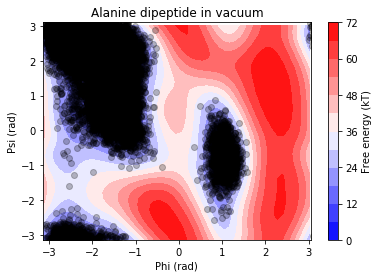

In [6]:
# Load in phi/psi points from unbiased trajectory
unb450 = np.loadtxt(open("res/L4_ala_confs_450K.csv", "rb"), delimiter=",")
unb450phi=unb450[:,0]
unb450psi=unb450[:,1]

# Create the contour plot
fig3 = pyp.figure()
ax3 = fig3.subplots()
CS3 = pyp.contourf(phi, psi, fe, 12, cmap='bwr')
ax3.set_title('Alanine dipeptide in vacuum')
ax3.set_xlabel('Phi (rad)')
ax3.set_ylabel('Psi (rad)')

# Make a colorbar for the plot
cbar3 = fig3.colorbar(CS)
cbar3.ax.set_ylabel('Free energy (kT)');

# put points on top of this
pyp.scatter(unb450phi,unb450psi, c='black', alpha=0.25);
pyp.xlim(-3.14, 3.05);
pyp.ylim(-3.14, 3.1);